# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

%load_ext version_information
%version_information numpy, unityagents, torch, matplotlib, pandas, gym

Software versions
Python 3.6.7 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.0.0 x86_64 i386 64bit
numpy 1.15.4
unityagents 0.4.0
torch 0.4.0
matplotlib 3.0.2
pandas 0.23.4
gym 0.10.9
Sun Mar 03 17:31:03 2019 HKT

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
state

array([1.        , 0.        , 0.        , 0.        , 0.84408134,
       0.        , 0.        , 1.        , 0.        , 0.0748472 ,
       0.        , 1.        , 0.        , 0.        , 0.25755   ,
       1.        , 0.        , 0.        , 0.        , 0.74177343,
       0.        , 1.        , 0.        , 0.        , 0.25854847,
       0.        , 0.        , 1.        , 0.        , 0.09355672,
       0.        , 1.        , 0.        , 0.        , 0.31969345,
       0.        , 0.        ])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

In [7]:
data_prefix = './data/2019-03-03-'
import os
os.getcwd()

'/Users/tomlee/Documents/self-study-development/mooc/udacity/deep-reinforcement-learning/p1_navigation'

In [8]:
import gym
import pickle
import random
import torch
import numpy as np
from collections import deque
# from dqn_agent import DQNAgent
from dqn.dqn_agent import DQNAgent
from dqn.double_dqn_agent import DDQNAgent
n_episodes = 2000
eps_start = 1.
eps_end=0.01
eps_decay=0.995
max_t = 1000
s_model = 'ddqn'



agent = DDQNAgent(state_size=state_size, action_size=action_size, seed=0)

scores = []                        # list containing scores from each episode
scores_std = []                    # List containing the std dev of the last 100 episodes
scores_avg = []                    # List containing the mean of the last 100 episodes
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    for t in range(max_t):
        # action = np.random.randint(action_size)        # select an action
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    scores_std.append(np.std(scores_window)) # save most recent std dev
    scores_avg.append(np.mean(scores_window)) # save most recent std dev
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
#         our target is to pass 13/
    if np.mean(scores_window)>=13.0:
        s_msg = '\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
        print(s_msg.format(i_episode, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), '%scheckpoint_%s.pth' % (data_prefix, s_model))
        break
        
# save data to use latter
d_data = {'episodes': i_episode,
          'scores': scores,
          'scores_std': scores_std,
          'scores_avg': scores_avg,
          'scores_window': scores_window}

pickle.dump(d_data, open('%ssim-data-%s.data' % (data_prefix, s_model), 'wb'))

Episode 100	Average Score: 0.67
Episode 200	Average Score: 4.40
Episode 300	Average Score: 7.25
Episode 400	Average Score: 10.96
Episode 461	Average Score: 13.06
Environment solved in 461 episodes!	Average Score: 13.06


In [9]:
import pickle
d_data = pickle.load(open('./data/2019-03-03-sim-data-ddqn.data', 'rb'))
s_msg = 'Environment solved in {:d} episodes!\tAverage Score: {:.2f} +- {:.2f}'
print(s_msg.format(d_data['episodes'], np.mean(d_data['scores_window']), np.std(d_data['scores_window'])))

Environment solved in 461 episodes!	Average Score: 13.06 +- 3.44


In [10]:
import pickle
d_data = pickle.load(open('./data/2019-01-24-sim-data-dqn.data', 'rb'))
s_msg = 'Environment solved in {:d} episodes!\tAverage Score: {:.2f} +- {:.2f}'
print(s_msg.format(d_data['episodes'], np.mean(d_data['scores_window']), np.std(d_data['scores_window'])))

Environment solved in 511 episodes!	Average Score: 13.01 +- 3.91


In [18]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
try:
    import warnings
    from IPython import get_ipython
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import defaultdict
    import json
    import numpy as np
    import pandas as pd
    try:
        from StringIO import StringIO
    except ImportError:
        from io import StringIO
    warnings.filterwarnings('ignore', category=UserWarning,
                            module='matplotlib')
    # Display inline matplotlib plots with IPython
    get_ipython().run_line_magic('matplotlib', 'inline')
    # aesthetics
    sns.set_palette('deep', desat=.6)
    sns.set_context(rc={'figure.figsize': (8, 4)})
    sns.set_style('whitegrid')
    sns.set_palette(sns.color_palette('Set2', 10))
    # loading style sheet
    get_ipython().run_cell('from IPython.core.display import HTML')
    get_ipython().run_cell('HTML(open("style/ipython_style.css").read())')
except:
    pass
###########################################

FileNotFoundError: [Errno 2] No such file or directory: 'style/ipython_style.css'

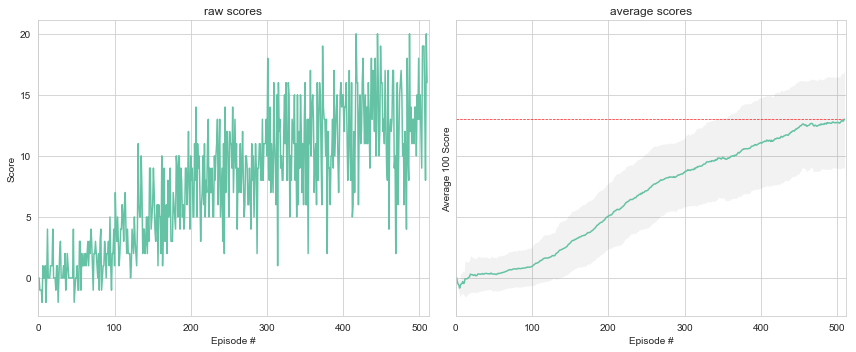

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#recover data
na_raw = np.array(d_data['scores'])
na_mu = np.array(d_data['scores_avg'])
na_sigma = np.array(d_data['scores_std'])

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(na_raw)), na_raw)
ax1.set_xlim(0, len(na_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=13., xmin=0.0, xmax=1.0, color='r', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(na_mu)), na_mu)
ax2.fill_between(np.arange(len(na_mu)), na_mu+na_sigma, na_mu-na_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average 100 Score')
ax2.set_xlabel('Episode #')
ax2.set_title('average scores')

f.tight_layout()

AttributeError: 'Figure' object has no attribute 'tiacorrght_layout'

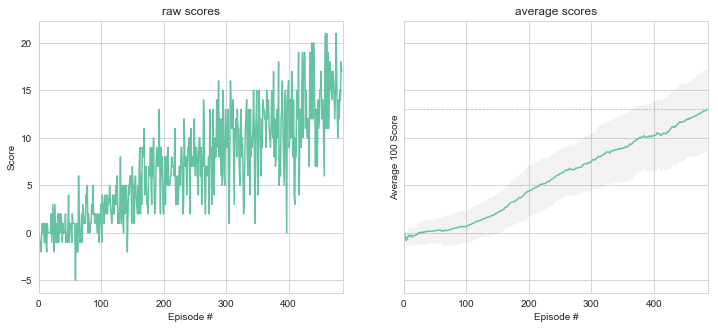

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#recover data
na_raw = np.array(d_data['scores'])
na_mu = np.array(d_data['scores_avg'])
na_sigma = np.array(d_data['scores_std'])

# plot the scores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# plot the sores by episode
ax1.plot(np.arange(len(na_raw)), na_raw)
ax1.set_xlim(0, len(na_raw)+1)
ax1.set_ylabel('Score')
ax1.set_xlabel('Episode #')
ax1.set_title('raw scores')

# plot the average of these scores
ax2.axhline(y=13., xmin=0.0, xmax=1.0, color='orange', linestyle='--', linewidth=0.7, alpha=0.9)
ax2.plot(np.arange(len(na_mu)), na_mu)
ax2.fill_between(np.arange(len(na_mu)), na_mu+na_sigma, na_mu-na_sigma, facecolor='gray', alpha=0.1)
ax2.set_ylabel('Average 100 Score')
ax2.set_xlabel('Episode #')
ax2.set_title('average scores')

f.tiacorrght_layout()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```